# for 671 region brain signal

In [1]:
import pandas as pd
df_signal = pd.read_csv('../../assets/brain205_signal_region671.csv')
df_signal['n671_u16_id'] = df_signal['n671_u16_id'].astype(int)
df_signal['count'] = df_signal['count'].astype(int)
df_signal['brain'] = df_signal['brain'].astype(str)
df_signal['modality'] = df_signal['modality'].astype(str)
df_signal['label'] = df_signal['label'].astype(str)
df_signal = df_signal[df_signal['n671_u16_id']!=0]
df_signal

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,n671_u16_id,count,sizecount,brain,scale,counts,modality,label
0,203,328776,29204,191813,11.257927,449668945,U19_Zeng,Plxnd1
1,231,93609,8315,191813,11.257927,449668945,U19_Zeng,Plxnd1
2,723,32197,2860,191813,11.257927,449668945,U19_Zeng,Plxnd1
3,725,34190,3037,191813,11.257927,449668945,U19_Zeng,Plxnd1
4,749,8736,776,191813,11.257927,449668945,U19_Zeng,Plxnd1
...,...,...,...,...,...,...,...,...
194534,463,2991,459,A3_16um_final,6.518387,336020149,Osten,0
194535,936,4849,744,A3_16um_final,6.518387,336020149,Osten,0
194536,375,1173,180,A3_16um_final,6.518387,336020149,Osten,0
194537,1017,12059,1850,A3_16um_final,6.518387,336020149,Osten,0


In [2]:
import pandas as pd
df_signal_brain = pd.pivot_table(df_signal,index='brain',values='count',aggfunc='sum')
df_signal_brain.index = df_signal_brain.index.astype(str)
df_signal_brain

,count
brain,
15257,187015145.0
17051,1428032.0
17052,114468584.0
17109,174930562.0
17298,174352028.0
...,...
211807,6109647.0
236174,19943145.0
A3_16um_final,319180105.0


In [4]:
import pandas as pd
import numpy as np
from utils import get_u16_from_u32_list
#NOTE region is not accurate
#because do the xyz region measure on anno_25 
#and do the left right by index but not n671_u16 nrrd

soma_file = '../../assets/soma200k_xyz_region671.csv'
df_soma = pd.read_csv(soma_file)
df_soma['regi_somaregion_n671_u32_check'] = df_soma['regi_somaregion_n671_u32_check'].apply(int)
n671_u32_id_list = df_soma['regi_somaregion_n671_u32_check'].tolist()
df_soma['regi_somaxyz'] = df_soma['regi_somaxyz'].astype(str)
leftid_list = [eval(s)[1] for s in df_soma['regi_somaxyz']]
isleft_list = (np.array(leftid_list)<228).tolist()
n671_u16_id_list = get_u16_from_u32_list(n671_u32_id_list,isleft_list)
df_soma['regi_somaregion_n671_u16_check'] = n671_u16_id_list
df_soma['regi_somaregion_n671_u16_check'] = df_soma['regi_somaregion_n671_u16_check'].astype(int)
df_soma['todel'] = 1
df_soma['todel'] = df_soma['todel'].astype(int)
df_soma = df_soma[df_soma['regi_somaregion_n671_u16_check']!=0]
df_soma

,brainid,raw_somaxyz,raw_somaregion,regi_somaxyz,regi_somaregion_n671_u32,regi_somaregion,regi_somaregion_n671_u32_check,regi_somaregion_check,regi_somaregion_n671_u16_check,todel
0,15257,"[12846.438, 20686.848, 3762.868]",NaN,"[224.133, 136.67, 210.274]",310,SF,310,SF,1181,1
3,15257,"[9707.336, 28942.707, 4827.952]",NaN,"[279.613, 180.116, 88.527]",672,CP,672,CP,1147,1
4,15257,"[6884.128, 14090.333, 3235.582]",NaN,"[207.738, 254.492, 308.483]",342,SI,342,SI,1228,1
5,15257,"[9347.471, 17057.223, 2969.26]",NaN,"[191.479, 214.211, 260.891]",351,BST,351,BST,1243,1
8,15257,"[12242.572, 7332.924, 4970.031]",NaN,"[267.488, 125.819, 414.819]",806,SSs2/3,806,SSs2/3,205,1
...,...,...,...,...,...,...,...,...,...,...
227576,236174,"[18176.244, 24154.77, 6192.542]",NaN,"[306.343, 239.819, 332.601]",780,PA,780,PA,1140,1
227577,236174,"[18117.527, 24033.283, 6208.595]",NaN,"[306.815, 239.014, 330.559]",780,PA,780,PA,1140,1
227578,236174,"[8812.607, 17915.576, 4825.907]",NaN,"[239.603, 85.751, 219.926]",296,ACAv2/3,296,ACAv2/3,469,1
227579,236174,"[9570.51, 7845.859, 6146.163]",NaN,"[297.042, 126.665, 71.783]",156,AUDd6a,156,AUDd6a,255,1


In [5]:
import pandas as pd
df_soma_brain = pd.pivot_table(df_soma,index='brainid',values='todel',aggfunc='sum')['todel']
df_soma_brain.index = df_soma_brain.index.astype('str')
df_soma_brain

brainid
15257     4977
17051      288
17052      241
17109      865
17298     6565
          ... 
201604       2
201605       7
201606      56
211541     347
236174     134
Name: todel, Length: 116, dtype: int32

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

df_signal_soma = pd.concat([df_signal_brain,df_soma_brain],axis=1).fillna(0)
df_signal_soma.columns=['signal','somata']
drop = np.nonzero(df_signal_soma.values==0)[0].tolist()
drop_index = df_signal_soma.index[drop]
df_signal_soma = df_signal_soma.drop(drop_index,axis=0)
df_signal_soma = df_signal_soma.sort_values(by='signal')

_,_,r,_,_ = scipy.stats.linregress(np.log10(df_signal_soma['somata']),np.log10(df_signal_soma['signal']))

fig = plt.figure()
ax1 = fig.add_subplot(111)

out = sns.regplot(x=np.log10(df_signal_soma['somata']),y=np.log10(df_signal_soma['signal']),color='red',ax=ax1)#label='#neurite voxel')
plt.text(2,4,f'R^2={round(r,2)}',va='center',ha='center',fontsize=10)

plt.subplots_adjust(bottom=0.2,top=1,left=0.2,right=0.8)
plt.savefig('../plots/signal_soma_brain.png',dpi=300)

df_signal_soma

AttributeError: module 'scipy' has no attribute 'stats'

In [8]:
import scipy.stats

ModuleNotFoundError: No module named 'scipy.sparse.linalg.eigen.arpack.arpack'

# for somated region brain signal

In [6]:
import pandas as pd
df_signal_brain_671 = pd.pivot_table(df_signal,index=['brain','n671_u16_id'],values=['count'],aggfunc='sum')
df_signal_brain_671.index = [str(i[0])+','+str(i[1]) for i in df_signal_brain_671.index]
df_signal_brain_671

,count
"15257,1",190329
"15257,2",190407
"15257,15",29
"15257,16",799
"15257,17",224
...,...
"AZ10_SR3B_6_A_647,2602",212
"AZ10_SR3B_6_A_647,2603",24781
"AZ10_SR3B_6_A_647,2604",39102
"AZ10_SR3B_6_A_647,2605",27259


In [7]:
import pandas as pd
df_soma_brain_671 = pd.pivot_table(df_soma,index=['brainid','regi_somaregion_n671_u16_check'],values=['todel'],aggfunc='sum')
df_soma_brain_671.index = [str(i[0])+','+str(i[1]) for i in df_soma_brain_671.index]
df_soma_brain_671

,todel
"15257,41",17
"15257,43",17
"15257,45",6
"15257,51",1
"15257,53",11
...,...
"236174,1120",1
"236174,1140",2
"236174,1147",30
"236174,1154",1


,signal,somata
brain,,
15257,119878792.0,4886.0
17051,31887.0,249.0
17052,28683132.0,206.0
17109,22906088.0,865.0
17298,92602825.0,6558.0
...,...,...
201604,3891519.0,2.0
201605,2310961.0,7.0
201606,8874065.0,55.0


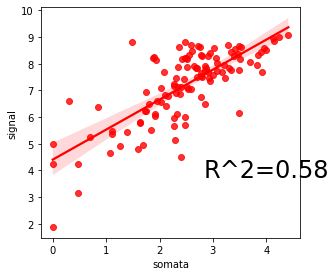

In [26]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score
import scipy
from scipy.optimize import curve_fit

df_signal_soma = pd.concat([df_signal_brain_671,df_soma_brain_671],axis=1).fillna(0)
df_signal_soma.columns=['signal','somata']
drop = np.nonzero(df_signal_soma.values==0)[0].tolist()
drop_index = df_signal_soma.index[drop]
df_signal_soma = df_signal_soma.drop(drop_index,axis=0)
df_signal_soma = df_signal_soma.sort_values(by='signal')

df_signal_soma['brain'] = [v[0] for v in df_signal_soma.index.str.split(',')]
df_signal_soma['n671_u16_id'] = [v[1] for v in df_signal_soma.index.str.split(',')]
df_signal_soma = df_signal_soma.groupby(by='brain').sum()

# print(scipy.stats.linregress(np.log10(df_signal_soma['somata']),np.log10(df_signal_soma['signal'])))
# f = lambda x,k,b: k*x + b
# popt,pcov = curve_fit(f,np.log10(df_signal_soma['somata']),np.log10(df_signal_soma['signal']))
# r_squared = r2_score(np.log10(df_signal_soma['signal']),f(np.log10(df_signal_soma['somata']),*popt))
# print(r_squared)
_,_,r,_,_ = scipy.stats.linregress(np.log10(df_signal_soma['somata']),np.log10(df_signal_soma['signal']))

fig = plt.figure()
ax1 = fig.add_subplot(111)

out = sns.regplot(x=np.log10(df_signal_soma['somata']),y=np.log10(df_signal_soma['signal']),color='red',ax=ax1)#label='#neurite voxel')
plt.text(4,4,f'R^2={round(r**2,2)}',va='center',ha='center',fontsize=24)

plt.subplots_adjust(bottom=0.2,top=1,left=0.2,right=0.8)
plt.savefig('../plots/signal_soma_brain_671.png',dpi=300)

df_signal_soma

# for 671 regional all-brains signal

In [45]:
df_signal_region_671 = pd.pivot_table(df_signal,index=['label','brain'],columns='n671_u16_id',values='count',aggfunc='sum',fill_value=0) #pivot index is the same range as np.unique
df_signal_region_671.columns = df_signal_region_671.columns.astype(int)
df_signal_region_671

n671_u16_id      1       2       15     16      17     18      19      20    \
label brain                                                                   
0     182737  4503777  919185  256226  49937  193962  32899  517687  113912   
      190891     4645    5184      18    109       9      0     173      18   
      190892      559     521       0      0       0      5       0       0   
      190900     1388     732       0      0       0      0       0       0   
      190902      201    2445      22      0       0      0       0       0   
...               ...     ...     ...    ...     ...    ...     ...     ...   
Vipr2 196463   712444  862020   62468   1097      45    631    2337     969   
      196464   667663  505697    5103   1215    4488     38      31      77   
      196465   370010  514809      29      7       0      7     355      51   
      196466   190573  125819     271  13796      42    492      14      42   
iCreV 182711   287246  212319       0      0       0      0       0       0   

n671_u16_id     21     22    ...    2599    2600   2601    2602   2603   2604  \
label brain                  ...                                                
0     182737  406675  90597  ...  154957  170160  20278  114377  29160  17106   
      190891       0      0  ...      27     420    109      54    548    768   
      190892       0      0  ...      43      48      0       0    548    222   
      190900       0      0  ...     173      19      0      48      9    569   
      190902       0      0  ...       0       0      0      44   1368    269   
...              ...    ...  ...     ...     ...    ...     ...    ...    ...   
Vipr2 196463      22   1833  ...  142084  203966  23971    1532  20800  47544   
      196464       0      0  ...   71636  103473   4597    1612   5539  13471   
      196465     570      0  ...   32219   76709   1288    1340   5931  17535   
      196466       0     14  ...   75768   66993    428    1405   1854   6634   
iCreV 182711       0      0  ...   11337    1637    204     398    125   1034   

n671_u16_id   2605  2606  2607  2608  
label brain                           
0     182737     0   453     0   147  
      190891   667   694     0     0  
      190892   987   401     0     0  
      190900     9   125     0     0  
      190902  1895  5776     0     0  
...            ...   ...   ...   ...  
Vipr2 196463  1991  1803     0     0  
      196464   109    77     0     0  
      196465   111  1895     0     0  
      196466  1005   271     0     0  
iCreV 182711    68   500     0     0  

[193 rows x 1341 columns]

In [46]:
voxel_dict = get_dict(671,16,'voxel')

df_signal_region_671 = df_signal_region_671.groupby(by='brain',level=0).sum()
df_signal_region_671 = df_signal_region_671.sum(axis=0)
voxel_list = [[voxel_dict[int(i)] if int(i) in voxel_dict else float('inf')][0] for i in df_signal_region_671.index]

df_signal_region_671 = pd.DataFrame(np.divide(df_signal_region_671.values,voxel_list),index=df_signal_region_671.index)
df_signal_region_671 = df_signal_region_671/(0.025*0.025*0.025)
df_signal_region_671.index = df_signal_region_671.index.astype(int)
df_signal_region_671

,0
n671_u16_id,
1,0.000000e+00
2,0.000000e+00
15,2.881466e+07
16,3.068488e+07
17,3.233157e+07
...,...
2604,1.059228e+08
2605,1.561146e+08
2606,1.335549e+08


In [47]:
df_soma_region_671 = pd.pivot_table(df_soma,index='regi_somaregion_n671_u16_check',values='todel',aggfunc='sum')['todel']
df_soma_region_671.index = df_soma_region_671 .index.astype(int)
voxel_list = [[voxel_dict[int(i)] if int(i) in voxel_dict else float('inf')][0] for i in df_soma_region_671.index]

df_soma_region_671 = pd.DataFrame(np.divide(df_soma_region_671.values,voxel_list),index=df_soma_region_671.index)
df_soma_region_671 = df_soma_region_671/(0.025*0.025*0.025)
df_soma_region_671.index = df_soma_region_671.index.astype(int)
df_soma_region_671

,0
regi_somaregion_n671_u16_check,
15,118.343195
17,119.626168
19,177.613321
21,124.791086
39,188.080404
...,...
2186,11.976328
2195,223.413539
2197,111.437588


,signal,somata
992,6.676430e+06,18.335774
1968,7.299521e+06,488.017429
1500,8.653528e+06,281.181352
1976,9.515492e+06,170.365687
1528,9.886507e+06,51.926978
...,...,...
2135,6.776509e+08,1751.081253
2169,7.090895e+08,632.486728
2195,8.068775e+08,223.413539
2085,8.230909e+08,2197.282842


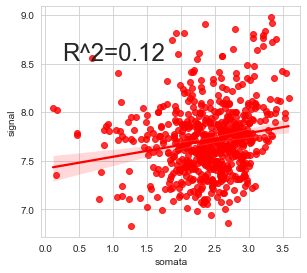

In [56]:
df_signal_soma = pd.concat([df_signal_region_671,df_soma_region_671],axis=1).fillna(0)
df_signal_soma.columns=['signal','somata']
drop = np.nonzero(df_signal_soma.values==0)[0].tolist()
drop_index = df_signal_soma.index[drop]
df_signal_soma = df_signal_soma.drop(drop_index,axis=0)
df_signal_soma = df_signal_soma.sort_values(by='signal')

r,_,_,_,_ = scipy.stats.linregress(np.log10(df_signal_soma['somata']),np.log10(df_signal_soma['signal']))

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.regplot(x=np.log10(df_signal_soma['somata']),y=np.log10(df_signal_soma['signal']),color='red',ax=ax1)#label='#neurite voxel')
plt.text(1,8.6,f'R^2={round(r,2)}',va='center',ha='center',fontsize=24)

plt.subplots_adjust(bottom=0.2,top=1,left=0.2,right=0.8)
plt.savefig('../plots/signal_soma_region_671.png',dpi=300)

df_signal_soma

In [50]:
from utils import get_u32_from_u16_list,get_level_id_list
df_signal_region = df_signal.copy()
n671_u32_id_list = get_u32_from_u16_list(df_signal_region['n671_u16_id'].tolist())
df_signal_region['n671_u32_id'] = n671_u32_id_list
df_signal_region['n671_u32_id'] = df_signal_region['n671_u32_id'].apply(int)
level = 316
n316_u32_id_list = get_level_id_list(n671_u32_id_list,level)
df_signal_region['n316_u32_id'] = n316_u32_id_list
df_signal_region['n316_u32_id'] = df_signal_region['n316_u32_id'].apply(int)
df_signal_region.index = list(range(len(df_signal_region)))
df_signal_region = df_signal_region.drop(np.nonzero(df_signal_region['n316_u32_id'].values==0)[0].tolist(),axis=0)
df_signal_region = pd.pivot_table(df_signal_region,index=['label','brain'],columns='n316_u32_id',values='count',aggfunc='sum',fill_value=0) #pivot index is the same range as np.unique
df_signal_region.columns = df_signal_region.columns.astype(int)
df_signal_region.to_csv('../../assets/brain205_signal_region316.csv')
df_signal_region

n316_u32_id   1          4          7          12         15         \
label brain                                                           
0     182737          0     489895      25308     153371     512691   
      190891        146      45982      18324       1188         73   
      190892          0       1973       2339         59          0   
      190900          0        576       1108        298          0   
      190902          0       5550        402          0          0   
...                 ...        ...        ...        ...        ...   
Vipr2 196463       5552      88067      19161      38647     168099   
      196464          0      57134      12473       1877      41864   
      196465          0       9046       1103         22      47873   
      196466        235      17689       2260       7967      34063   
iCreV 182711          0       1031        818        635        432   

n316_u32_id   19         23         27         30         35         ...  \
label brain                                                          ...   
0     182737     569743      19349      44511        611      12733  ...   
      190891        118        795        274         18          0  ...   
      190892          0          0          0          0          0  ...   
      190900          0          0         19          0          0  ...   
      190902          0          0          0          0          0  ...   
...                 ...        ...        ...        ...        ...  ...   
Vipr2 196463       9850      46732     292630     167641         89  ...   
      196464          0      21901     136869     114654         85  ...   
      196465          7      10974      96117      87334        228  ...   
      196466        470       8302       2981      99280         92  ...   
iCreV 182711      23322       1932        442          0         22  ...   

n316_u32_id   563807439  576073699  576073704  589508447  589508451  \
label brain                                                           
0     182737      10512         22      31211          0        237   
      190891         18          0          0         54        173   
      190892          0          0          0          0         10   
      190900          0          0          0         67          0   
      190902          0          0         22         33         11   
...                 ...        ...        ...        ...        ...   
Vipr2 196463      31094      10783      75047      22009          7   
      196464      15723      44855      21629      48915          0   
      196465       1732       8989      10455        873         21   
      196466         14      36482       2203       8559          0   
iCreV 182711        272          0          0      19650        591   

n316_u32_id   589508455  599626923  599626927  606826663  607344830  
label brain                                                          
0     182737        520      69695       1336       1324     109403  
      190891        356          0         45        182        850  
      190892          0          0          0          0         48  
      190900          0          0         48         19        183  
      190902          0          0          0          0          0  
...                 ...        ...        ...        ...        ...  
Vipr2 196463       6401          7          0         67        503  
      196464        864        116        148          0        412  
      196465       2990          0        125          0          7  
      196466       1140          0          0          0          0  
iCreV 182711         90         22        124          0        238  

[193 rows x 314 columns]

In [51]:
voxel_dict = get_dict(316,32,'voxel')

df_signal_region = pd.read_csv('../../assets/brain205_signal_region316.csv',usecols=list(range(1,316)),index_col='brain')
df_signal_region = df_signal_region.sort_index()
df_signal_region = df_signal_region.sum(axis=0)
voxel_list = [[voxel_dict[int(i)] if int(i) in voxel_dict else float('inf')][0] for i in df_signal_region.index]
df_signal_region = pd.DataFrame(np.divide(df_signal_region.values,voxel_list),index=df_signal_region.index)
df_signal_region = df_signal_region/(0.025*0.025*0.025)
df_signal_region.index = df_signal_region.index.astype(int)
df_signal_region

,0
1,1.808677e+07
4,2.209283e+08
7,3.422882e+07
12,3.966812e+07
15,4.855160e+07
...,...
589508455,3.963524e+08
599626923,1.530152e+07
599626927,3.925466e+07
606826663,1.804313e+07


In [52]:
df_soma_region = df_soma.copy()
df_soma_region['to_del'] = 1
df_soma_region = pd.pivot_table(df_soma_region,index='regi_somaregion_n671_u32_check',values='to_del',aggfunc='sum')
level = 316
n671_u32_id_list = df_soma_region.index.astype('int').tolist()
n316_u32_id_list = get_level_id_list(n671_u32_id_list,level)
df_soma_region['n316_u32_id'] = n316_u32_id_list
df_soma_region = pd.pivot_table(df_soma_region,index='n316_u32_id',values='to_del',aggfunc='sum')['to_del']
voxel_list = [[voxel_dict[int(i)] if int(i) in voxel_dict else float('inf')][0] for i in df_soma_region.index]
df_soma_region = pd.DataFrame(np.divide(df_soma_region.values,voxel_list),index=df_soma_region.index)
df_soma_region = df_soma_region/(0.025*0.025*0.025)
df_soma_region.index = df_soma_region.index.astype(int)
df_soma_region

,0
n316_u32_id,
0,0.000000
1,618.669745
4,1755.383853
7,152.885805
12,276.308689
...,...
576073704,32.634033
589508447,170.704601
589508451,224.287673


,signal,somata
126,7.964101e+06,141.767167
1069,9.841685e+06,221.855398
1107,1.130549e+07,85.158758
307,1.150387e+07,105.105722
35,1.171962e+07,61.420345
...,...,...
1007,6.961460e+08,875.353253
1033,7.199109e+08,316.353754
989,7.575983e+08,111.783420
928,8.190611e+08,1095.657709


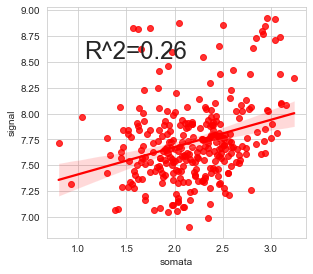

In [55]:
df_signal_soma = pd.concat([df_signal_region,df_soma_region],axis=1).fillna(0)
df_signal_soma.columns=['signal','somata']
drop = np.nonzero(df_signal_soma.values==0)[0].tolist()
drop_index = df_signal_soma.index[drop]
df_signal_soma = df_signal_soma.drop(drop_index,axis=0)
df_signal_soma = df_signal_soma.sort_values(by='signal')

r,_,_,_,_ = scipy.stats.linregress(np.log10(df_signal_soma['somata']),np.log10(df_signal_soma['signal']))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.set_style('whitegrid')
sns.regplot(x=np.log10(df_signal_soma['somata']),y=np.log10(df_signal_soma['signal']),color='red',ax=ax1)#label='#neurite voxel')
plt.text(1.6,8.6,f'R^2={round(r,2)}',va='center',ha='center',fontsize=24)

plt.subplots_adjust(bottom=0.2,top=1,left=0.2,right=0.8)
plt.savefig('../plots/signal_soma_region316.png',dpi=300)

df_signal_soma

# history

# calc brain correlation across regions

In [ ]:
df_signal_new = df_signal.copy()
df_signal_new = pd.pivot_table(df_signal_new,index=['label','brain'],columns='n671_u16_id',values='count',aggfunc='sum',fill_value=0)
df_signal_new.columns = df_signal_new.columns.astype(int)
df_signal_region_671 = df_signal_region_671[df_signal_region_671.columns[df_signal_region_671.columns!=0]]
df_signal_new 

In [ ]:
from utils import get_dict,write_json
def get_arangement(df_signal):
    arange = []
    labels = [l for l in np.unique(df_signal['label']) if (l!='0')]
    brains = [np.unique(df_signal[df_signal['label']==l]['brain']).tolist() for l in labels]
    braincounts = [[df_signal[df_signal['brain']==b]['counts'].values[0] for b in bs] for bs in brains]
    for l,bs,bcs in zip(labels,brains,braincounts):
        bs = sorted(bs,key=lambda b:bcs[bs.index(b)])
        bcs = sorted(bcs)
        arange.append([str(l),[str(b) for b in bs],[int(bc) for bc in bcs]]) 
    return arange

def get_brains_corr(df):
    df_new = pd.DataFrame(df.values.T,columns=df.index,index=df.columns)
    df_new.replace(0, np.nan, inplace=True)
    corr = df_new.corr(min_periods=20, method='spearman')
    corr = corr.fillna(0)
    return corr

def plot_brains_signal_diversity(df_signal,arange=[]):
    level = 671
    uint = 16
    voxel_dict = get_dict(level,uint,key='voxel')
    if arange:
        data = []
        for l,bs,bcs in arange: 
            print('\n',l,bs,bcs) 
            df_label = df_signal.loc[l]
            df_label = df_label.loc[bs]            
            voxel_list = [[voxel_dict[i]/(0.025*0.025*0.025) if i in voxel_dict else float('inf')][0] for i in df_label.columns]
            df_label = pd.DataFrame(df_label.values/voxel_list,columns=df_label.columns,index=df_label.index)
            corr = get_brains_corr(df_label)
            corr = corr.replace(1,np.nan)
            corr = abs(corr)
            mean = np.nanmean(corr)
            data.append([l,mean,'mean'])
            pos = mean+np.nanstd(corr)
            data.append([l,pos,'pos'])
            neg = mean-np.nanstd(corr)
            data.append([l,neg,'neg'])
        df = pd.DataFrame(np.array(data),index=list(range(len(data))),columns=['lines','value','agg'])
        df['lines'] = df['lines'].astype(str)
        df['value'] = df['value'].astype(float)
        df = df.replace(np.nan,1)
        df['agg'] = df['agg'].astype(str)
        fig,ax = plt.subplots(figsize=(3,8))
        sns.lineplot(data=df, x='value', y='lines',orient='y',c='m')
        for i,n in enumerate(df['value'][df['agg']=='mean']):
            plt.text(n,i,round(n,2),va='center',fontsize=12)
        plt.text(0.3,i+1.5,'correlation',va='center',fontsize=13.5)
        ax.spines['top'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        #ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        plt.savefig('../plots/lines_diversity.png',dpi=300)
        return df
    
    
#arange = get_arangement(df_signal)
write_json(arange,'../../assets/lines_info.json')
print(arange)
df = plot_brains_signal_diversity(df_signal_new,arange)

In [ ]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(25,2))
#fig = plt.figure(figsize=(6,2))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

sns.scatterplot(x=list(range(len(df_signal_soma))),y=df_signal_soma['signal'],color='black',ax=ax1)#label='#neurite voxel')
ax1.set_yscale('log')
#ax1.set_ylabel('')
#ax1.legend(bbox_to_anchor=[.7,.28],fontsize=14,frameon=False,handletextpad=0)
#ax1.legend(bbox_to_anchor=[.2,.8],fontsize=14,frameon=False,handletextpad=0)
ax1.spines['left'].set_visible(False)  
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)  
ax1.spines['bottom'].set_visible(False)
# for tick in ax1.yaxis.get_major_ticks():
#     print(tick)
#     tick.label.set_fontsize(40)
#ax1.tick_params(left=False,right=False,top=False,bottom=False,labelsize=14,labelrotation=90)
#ax1.grid(True,linestye='--',c='black')
#ax1.set_xticks([1,116])
#ax1.axis('off')

sns.scatterplot(x=list(range(len(df_signal_soma))),y=df_signal_soma['somata'],color='red',ax=ax2)#label='#somata')
ax2.set_yscale('log')
#ax2.set_ylabel('')
#ax2.legend(bbox_to_anchor=[.83,.28],fontsize=14,frameon=False,handletextpad=0)
#ax2.legend(bbox_to_anchor=[.165,.7],fontsize=14,frameon=False,handletextpad=0)
ax2.spines['left'].set_visible(False)  
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)  
ax2.spines['bottom'].set_visible(False)
#ticks = [item.get_text() for item in ax2.get_xticklabels()]
# for tick in ax2.yaxis.get_major_ticks():
#     print(tick.get_text())
#     tick.label.set_fontsize(40)
# ax2.set_yticklabels(ax2.yaxis.get_major_ticks(),fontsize=40)
#ax2.grid(True,linestyle=':',c='red')
#ax2.set_xticks([1,116])
#ax2.minorticks_off()
#ax2.tick_params(left=False,right=False,top=False,bottom=False,labelsize=14,labelrotation=90)
#ax2.axis('off')

plt.subplots_adjust(bottom=0.2,top=1,left=0.2,right=0.8)
#plt.title('brain ID          ',fontsize=14)
#plt.title('region ID                          ',fontsize=14)
plt.savefig('../plots/signal_soma_brain.png',dpi=300)
